In [1]:
import matplotlib.pyplot as plt #used create visualizations
import tensorflow as tf #used for ml & dl
from tensorflow import keras #high level api of tf used for trainig dl models
from tensorflow.keras.models import Sequential #this is a linear stack of layers in keras useful in creating simple nn
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam #used as optimizer adaptive learning rate optimization
from tensorflow.keras.callbacks import EarlyStopping #call back used to stop training when a monitered metric has stopped improving prevent overfitting and training time
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA #technique for dimensionality reduction it increases interpretability while minimizing information loss
from sklearn.model_selection import train_test_split #split dataset into training & tesing subset
import seaborn as sns #also hepls in visualization procinding high level interface for drawing
import pickle #used for serializing and deserializing python object structre used for saving and loading models
import os #it provides a way of using os system dependent functionality like readig or writing
import numpy as np # used to perform scientific computation for array matrices & mathematical func
import cv2  #used for computer vision task like image processig
%matplotlib inline #it is a magic function that ensures matplotlib are displayed in line

#desnse fully connected layer where each neuron recieves input feom all neurons
#activation applies an activation function to the output layer
#conv2d 2d Convolutional layer used for image processing
#maxpooling2d pooling layer that performs max pooling operations for spatial data
#flatten flatten the input converting a multi dimensional tensor into a single dimension
#dropout A regularization technique that randomly sets a fraction of input units to 0 at each update during training time
#batch normalization normalizes the activation of the previous layer at each batch,improving the speed performance & statbility of nn
#prc computes p-r curves for diff probablity thresholds
#roc Computes reciever operating charcterstics
#acc_score calcualte the accuracy of model  tp+tn/allprediction
#precison calculate the preciosn tp/tp+fp
#recall calculate the recall tp/tp+fn

In [50]:
labels = ['PNEUMONIA', 'NORMAL'] #dataset contains both label
img_size = 200 #this set image size to 200x200 pixel

def get_training_data(data_dir): #function to fetch datadir
    data = [] #initialize empty array to store image data
    labels_list = [] #empty array to store label corresponding each image
    for label in labels: #starts a loop over the labels for both labels
        path = os.path.join(data_dir, label) #constructs a path to directory containg images for current label
        class_num = labels.index(label) #index of current labels 0 for pneumonia and 1 for normal
        for img in os.listdir(path): #loop for directory specified by the path
            try: #begins a try expect block to handel any error
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #reads the image from the path & conert into grayscae image
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) #resize the image into 200x200px
                data.append(resized_arr) #add resize image to data list
                labels_list.append(class_num) # add numeric class label (0 for pnuemonia and 1 for normal)
            except Exception as e: #catches any exception that occur during the image reading or resizing process
                print(e) #print the exception message
    return np.array(data), np.array(labels_list) #converts the list into numppy array

<h2>Preparing the training and testing data</h2>

In [53]:
train_images, train_labels = get_training_data('chest_xray/train')
test_images, test_labels = get_training_data('chest_xray/test')
val_images, val_labels = get_training_data('chest_xray/val')

#calls the function get_training_data by an argument


In [61]:
train_images, train_labels = train
test_images, test_labels = test
val_images, val_labels = val

In [63]:
pnenumonia = 0  #initialize the variable to 0 ,will be used to count the label
normal = 0 #initialize the variable to 0 ,will be used to count the label

for label in train[1]: #starts loop that iterates over train 1
    if label == 0: #check if the label is 0 then add +1 to pnenumoia esle to normal
        pnenumonia+=1
    else:
        normal+=1
        
print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 3875
Normal: 1341
Pneumonia - Normal: 2534


<h2>Visualize training images</h2>

PNEUMONIA


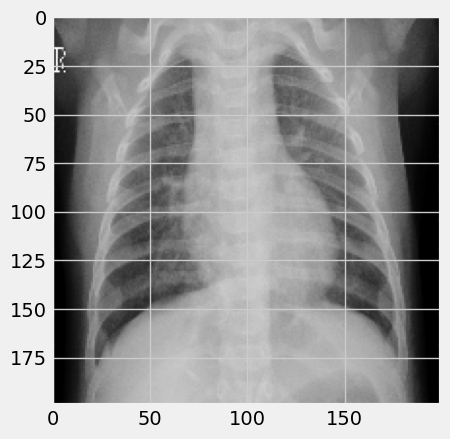

In [70]:
plt.imshow(train_images[1], cmap='gray') #displays the train image ingrayscale
print(labels[train_labels[1]]) #prints the label corresponding to image

<h2 >We are incoprating the validation data into the training data because it does not contain enough examples. </h2>

In [76]:
X = [] #an empty list to store features
y = [] #an empty list to store labels

for feature, label in zip(train_images, train_labels): #loopsthrough each image  and label 
    X.append(feature) #append feature to x and label to y
    y.append(label)

for feature, label in zip(test_images, test_labels):
    X.append(feature)
    y.append(label)

for feature, label in zip(val_images, val_labels):
    X.append(feature)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1) #converts x into aaray -1 means size of this dim based on other dimension ,'img_size' of each image 200x200px 1 represnts the images are grayscale 1channel 
y = np.array(y) #converts y list into array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
#X and y are the features and labels to be split test size=0.2 20% used for testing  
#random state ensures reproducibilty by seeding the random number generator
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#print the shape of the training and testing set for both features

(4684, 200, 200, 1) (1172, 200, 200, 1) (4684,) (1172,)


In [78]:
X_train = X_train / 255 #normalizes the dataset,each pixel value is divided by 255, orignal pixel value ranges from 0 to 255
X_test = X_test / 255

CNN (Convolutional Neural Network) g

![](https://www.researchgate.net/publication/321286547/figure/download/fig6/AS:564402564472832@1511575465150/A-convolutional-neural-networks-CNN.png)

In [91]:
model = Sequential() #creates a new instance of sequential model

model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#adds a 2d Convolutional layer with 256 filters each filter of size (3,3) , specifies the shape of input excluding the batxh size(200,200,1)
#padding=same means output size will be the same as the input size 
#add relu to introduce non linearity
#add maxpooling layer to reduce the spatial dimensions (downsampling)
#add batch normalization to normalize the activations of previous layer

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.5)) #adds a droput layer with dropout rate of 0.5 to prevent overfitting
model.add(Dense(64)) #add a dense layer with 64 unit
model.add(Activation('relu')) #add relu activation

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

early_stop = EarlyStopping(patience=3, monitor='val_loss') #configures early stooping to monitor the val loss and stop training if val los doest not improve for 3 consecutive epoch
adam = Adam(learning_rate=0.0001) #Configures adam optimizer with learning rateof 0.0001

#compiles the model with binary cross entropy loss appropriate for binary classificiation
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 200, 200, 256)       │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 200, 200, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 100, 100, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 100, 100, 256)       │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 100, 100, 64)        │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 50, 50, 64)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 16)          │           9,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 25, 25, 16)          │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 800,141 (3.05 MB)

 Trainable params: 799,791 (3.05 MB)

 Non-trainable params: 350 (1.37 KB)

None


In [95]:
history = model.fit(X_train, y_train, batch_size=15, epochs=7, validation_split=0.20, callbacks=[early_stop])
#model.fit trains the model on training data ,the fit method returns a history object containing all the info
#batch size the number of smaples per grdient update 15 samples will be used in eaach batch for grdnt calc
#epoch number of times entire dataset will be pass through model
#validation spilt part of data used for training
#earlystop as callbak 


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1243s 5s/step - acc: 0.7211 - loss: 0.6334 - val_acc: 0.6990 - val_loss: 1.3331
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1295s 5s/step - acc: 0.8924 - loss: 0.2523 - val_acc: 0.7012 - val_loss: 0.7950
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1131s 5s/step - acc: 0.9238 - loss: 0.2045 - val_acc: 0.9360 - val_loss: 0.1703
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1080s 4s/step - acc: 0.9312 - loss: 0.1754 - val_acc: 0.9402 - val_loss: 0.1436
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1100s 4s/step - acc: 0.9383 - loss: 0.1646 - val_acc: 0.9434 - val_loss: 0.1448
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 922s 4s/step - acc: 0.9476 - loss: 0.1551 - val_acc: 0.9424 - val_loss: 0.1479
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 909s 4s/step - acc: 0.9372 - loss: 0.1710 - val_acc: 0.9477 - val_loss: 0.1457


In [97]:
model.evaluate(X_test, y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - acc: 0.9584 - loss: 0.1157


[0.11476998776197433, 0.9581910967826843]

<h2>Visualizing our training progress</h2>

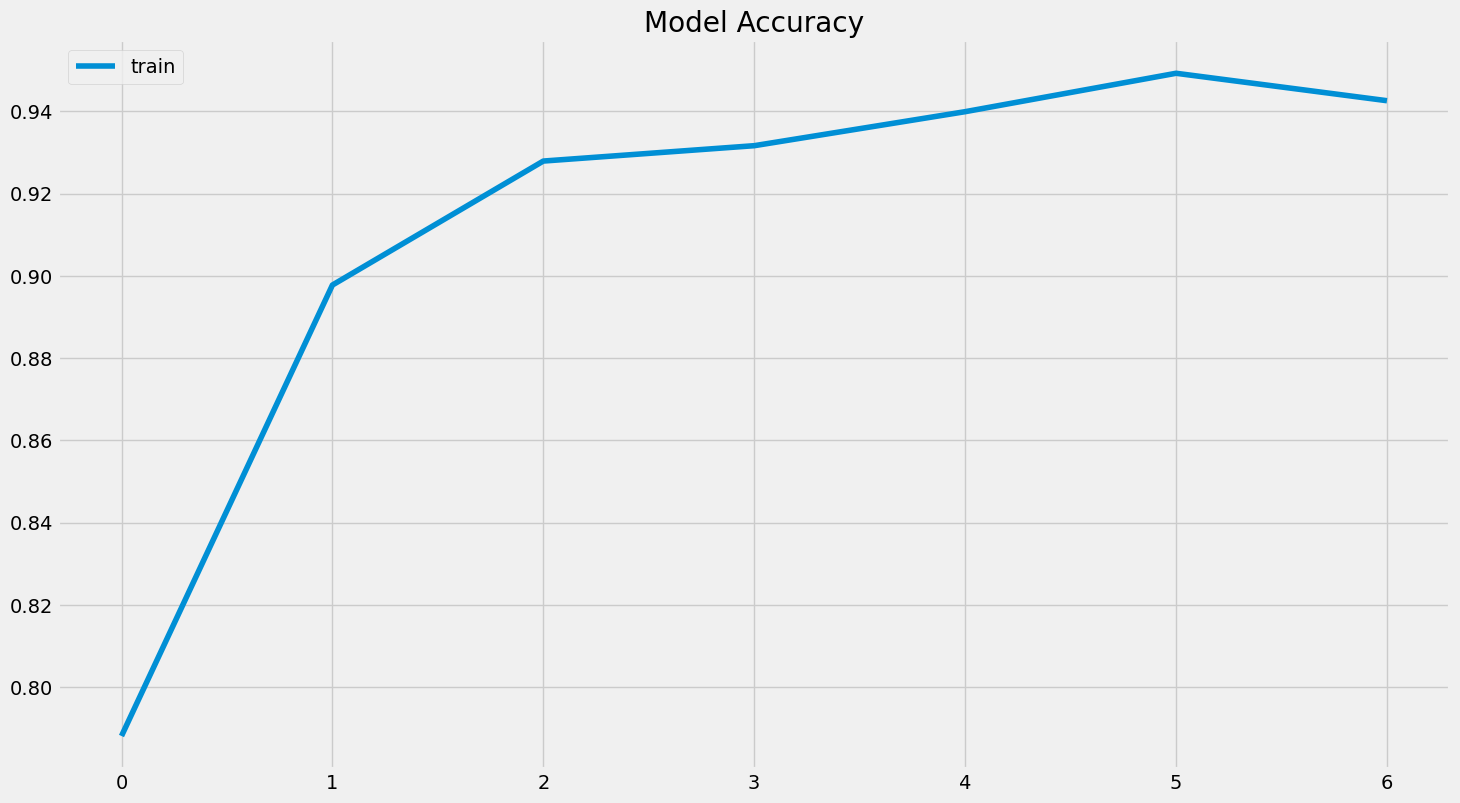

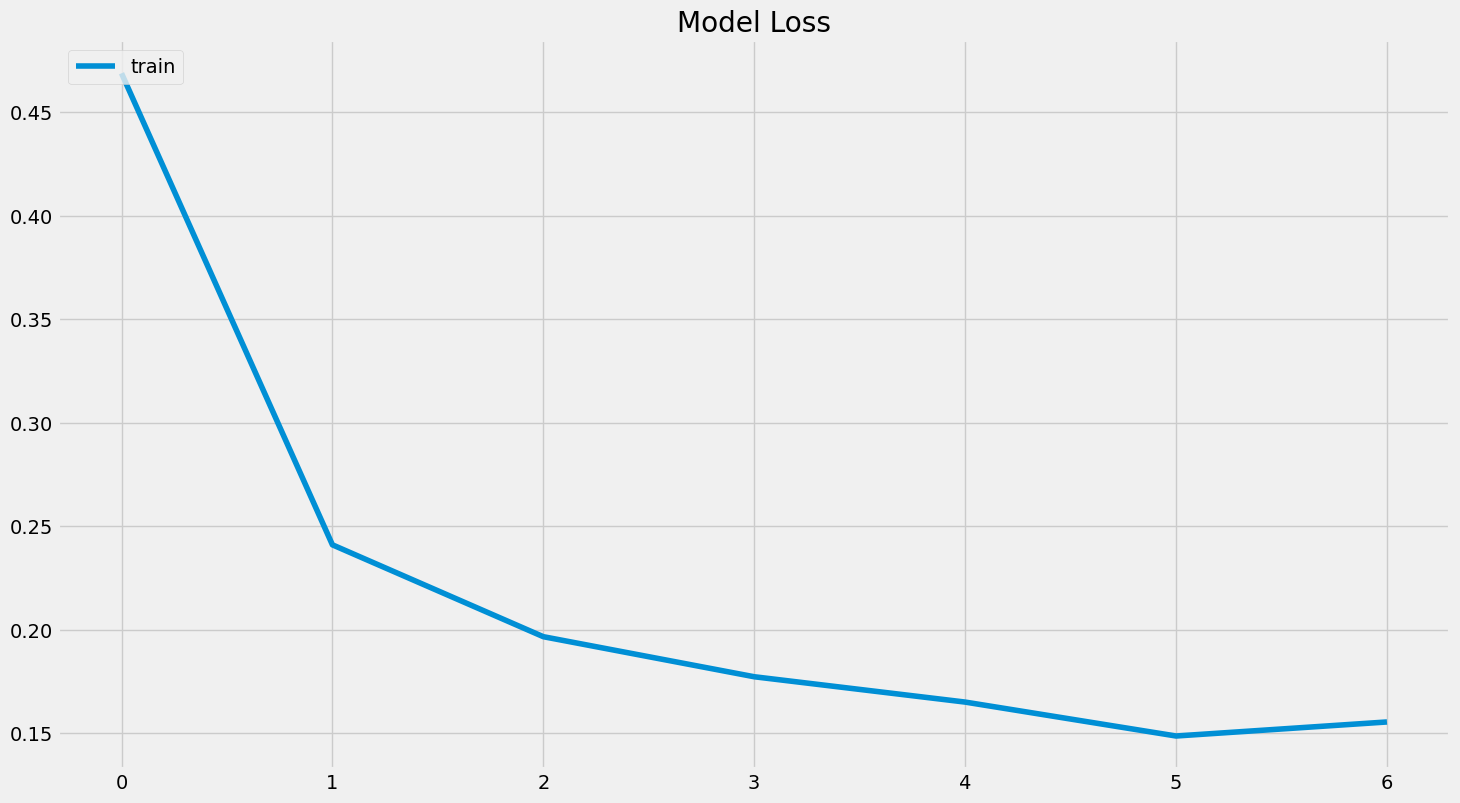

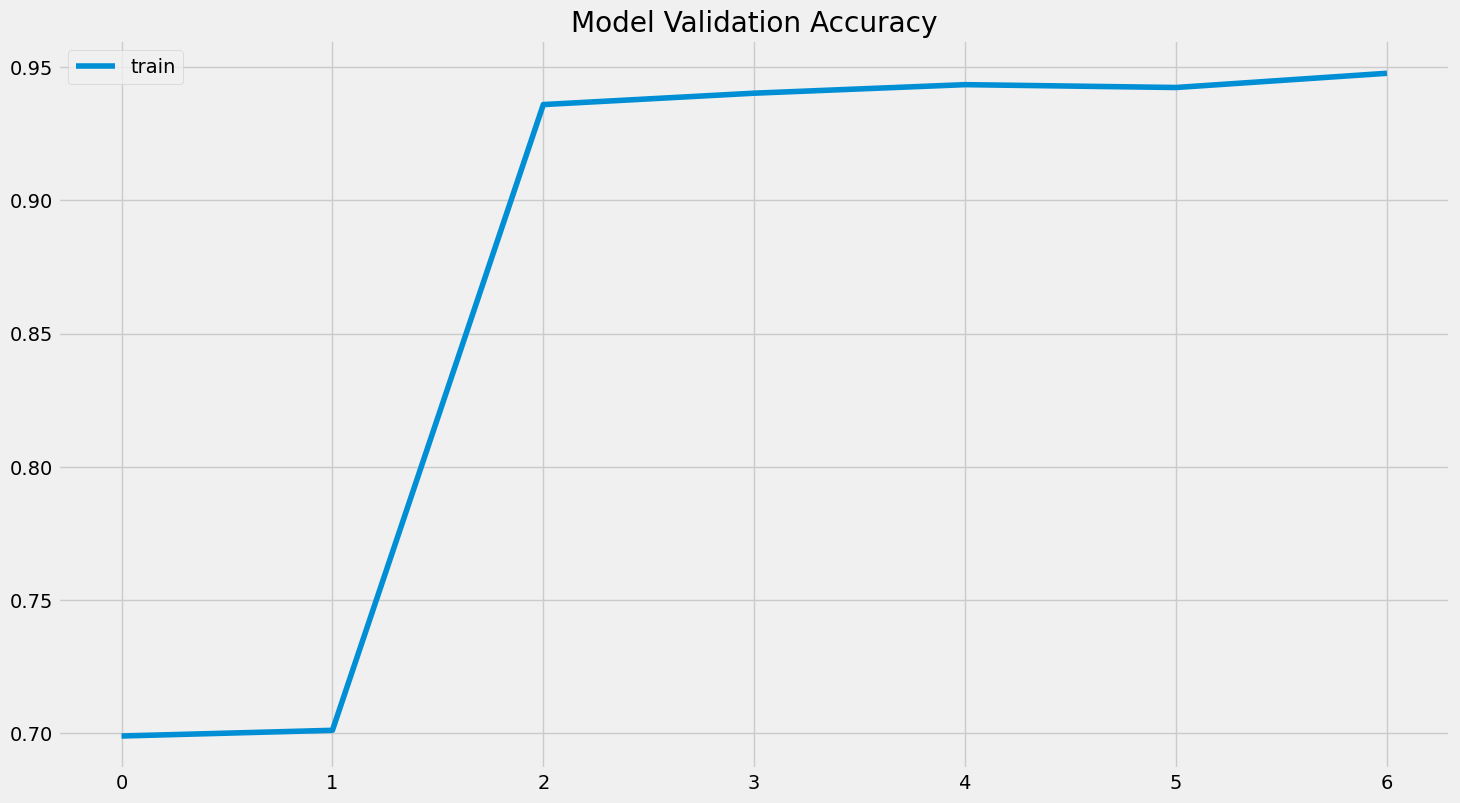

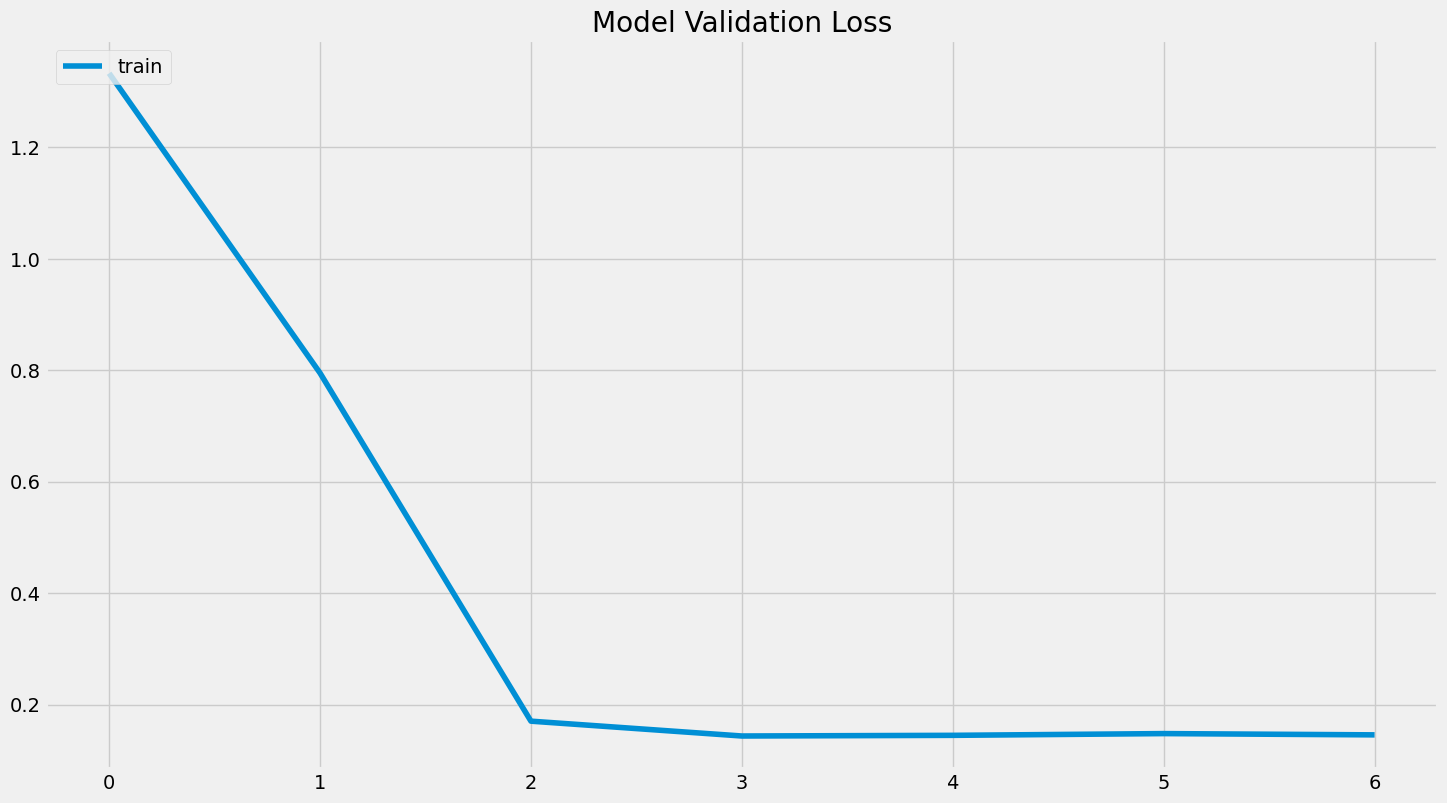

In [99]:
plt.figure(figsize=(16, 9)) #cretes new fig of 16 inch wide and 9in tall
plt.plot(history.epoch, history.history['acc']) #plot the training and accuray against epoch number
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_acc'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

<h2>Prepare data for precision vs. recall and ROC</h2>

In [101]:
pred = model.predict(X_train) #uses the train modelmodel to predict class probablities
precisions, recalls, thresholds = precision_recall_curve(y_train, pred) #computes the prec-recall curve for binary classification problem
fpr, tpr, thresholds2 = roc_curve(y_train, pred)#compute roc curve

147/147 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step


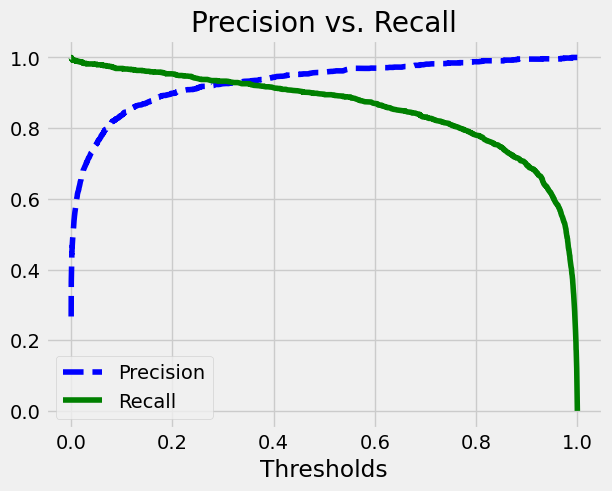

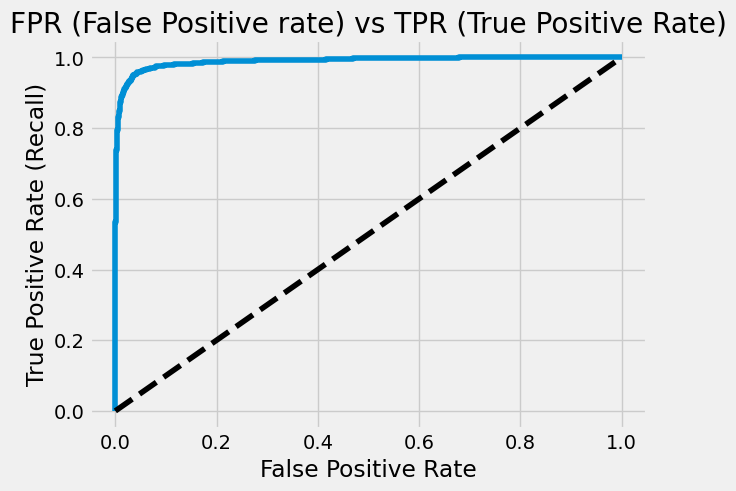

In [103]:
#function that take three param precison recall and threshold
#precsion [:-1]excludes last prec value b-- denotes bue dashed line
#recall [:-1]excludes last prec value g- denotes green solid line

def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()
#plots roc curve by plotting fpr vs tpr
#plots a diagonal ine from 0,0 to 1,1 k-- black dashed line
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)
plot_roc(fpr, tpr)

In [107]:
predictions = model.predict(X_test)
#this line generated prediction for test dataset ('X-test')using trained model

37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step


<h2>Set thresholds for our model, we want the results to be precise while not sacraficing too much recall </h2>

In [109]:
binary_predictions = [] #empty list is initilized to store binary predictions
#precisions >= 0.95: This creates a boolean array where each element is True if the precision value is greater than or equal to 0.95, and False otherwise.
#np.argmax Finds the index of the first occurrence of True in the boolean array. This index corresponds to the threshold value where the precision is at least 0.95.
#thresholds Retrieves the threshold value from the thresholds array using the index found by np.argmax.
threshold = thresholds[np.argmax(precisions >= 0.95)] 
for i in predictions: #iterates through each predicted probablity in predcitions
    if i >= threshold: #checks the probablity is greater tha or equal to selected threshold
        binary_predictions.append(1) #append 1 if condition met indicating a postive class prediction
    else:
        binary_predictions.append(0) # append 0 if condition not indicating negative class

In [111]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9556313993174061
Precision on testing set: 0.9209726443768997
Recall on testing set: 0.9209726443768997


Plotting the confusion matrix. Here is how we interpet one.



[Text(0, 0.5, 'PNEUMONIA'), Text(0, 1.5, 'NORMAL')]

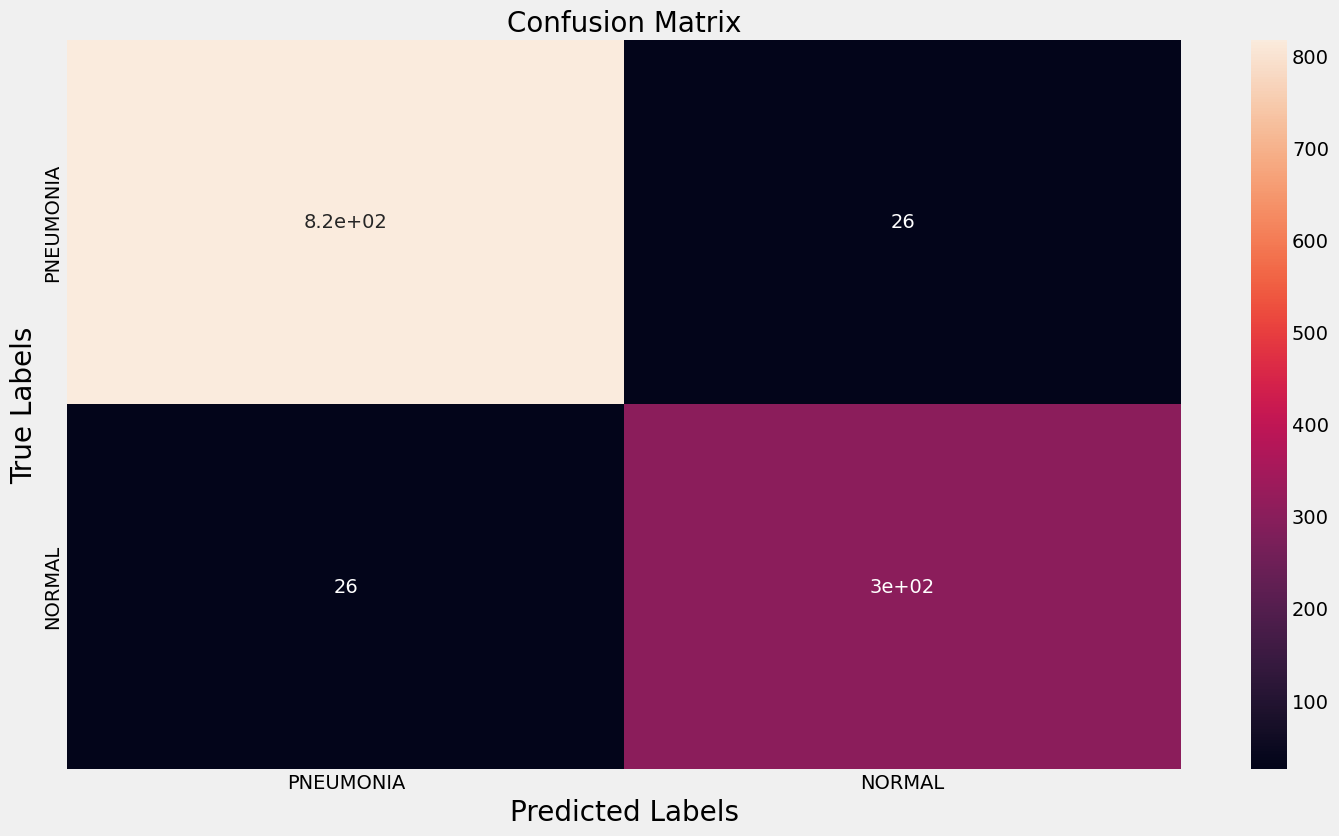

In [115]:
matrix = confusion_matrix(binary_predictions, y_test) # this function computes the confusion matrix for the binary classification predictions
plt.figure(figsize=(16, 9)) 
ax= plt.subplot() #creates new subplot in the figure and return an axes as ax
sns.heatmap(matrix, annot=True, ax = ax) #creates a heatmap of the confusion matrix using seaborn

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

<h2>Download the model</h2>

In [123]:
 model.save('2115500155_Uday_Gupta_classifier.h5')